In [1]:
import pandas as pd 
import matplotlib.pyplot as plt


In [2]:
df = pd.read_excel('event(+1).xlsx')

In [3]:
df

,YYYY,DOY,HR,MN,BX,BY,BZ,SPEED,Proton Density,Flow Pressure,AE-index,SYM/H
0,2018,131,0,0,9999.99,9999.99,9999.99,99999.9,999.99,99.99,82,-28
1,2018,131,0,1,9999.99,9999.99,9999.99,99999.9,999.99,99.99,83,-28
2,2018,131,0,2,9999.99,9999.99,9999.99,99999.9,999.99,99.99,90,-28
3,2018,131,0,3,9999.99,9999.99,9999.99,99999.9,999.99,99.99,87,-28
4,2018,131,0,4,9999.99,9999.99,9999.99,99999.9,999.99,99.99,81,-28
...,...,...,...,...,...,...,...,...,...,...,...,...
4315,2018,133,23,55,2.40,-2.48,-1.08,401.9,3.79,1.22,128,-8
4316,2018,133,23,56,2.84,-2.14,-1.09,401.2,3.73,1.20,119,-9
4317,2018,133,23,57,2.79,-2.10,-1.20,398.6,3.97,1.26,118,-9
4318,2018,133,23,58,2.51,-2.19,-1.60,399.9,3.85,1.23,123,-8


In [4]:

df['Datetime'] = pd.to_datetime(df['YYYY'].astype(str) + df['DOY'].astype(str), format='%Y%j') + pd.to_timedelta(df['HR'], unit='h') + pd.to_timedelta(df['MN'], unit='m')


In [5]:
df

,YYYY,DOY,HR,MN,BX,BY,BZ,SPEED,Proton Density,Flow Pressure,AE-index,SYM/H,Datetime
0,2018,131,0,0,9999.99,9999.99,9999.99,99999.9,999.99,99.99,82,-28,2018-05-11 00:00:00
1,2018,131,0,1,9999.99,9999.99,9999.99,99999.9,999.99,99.99,83,-28,2018-05-11 00:01:00
2,2018,131,0,2,9999.99,9999.99,9999.99,99999.9,999.99,99.99,90,-28,2018-05-11 00:02:00
3,2018,131,0,3,9999.99,9999.99,9999.99,99999.9,999.99,99.99,87,-28,2018-05-11 00:03:00
4,2018,131,0,4,9999.99,9999.99,9999.99,99999.9,999.99,99.99,81,-28,2018-05-11 00:04:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4315,2018,133,23,55,2.40,-2.48,-1.08,401.9,3.79,1.22,128,-8,2018-05-13 23:55:00
4316,2018,133,23,56,2.84,-2.14,-1.09,401.2,3.73,1.20,119,-9,2018-05-13 23:56:00
4317,2018,133,23,57,2.79,-2.10,-1.20,398.6,3.97,1.26,118,-9,2018-05-13 23:57:00
4318,2018,133,23,58,2.51,-2.19,-1.60,399.9,3.85,1.23,123,-8,2018-05-13 23:58:00


In [6]:
df=df[df["BX"]!=9999.99]

In [7]:
df=df[df["Proton Density"]!=999.99]

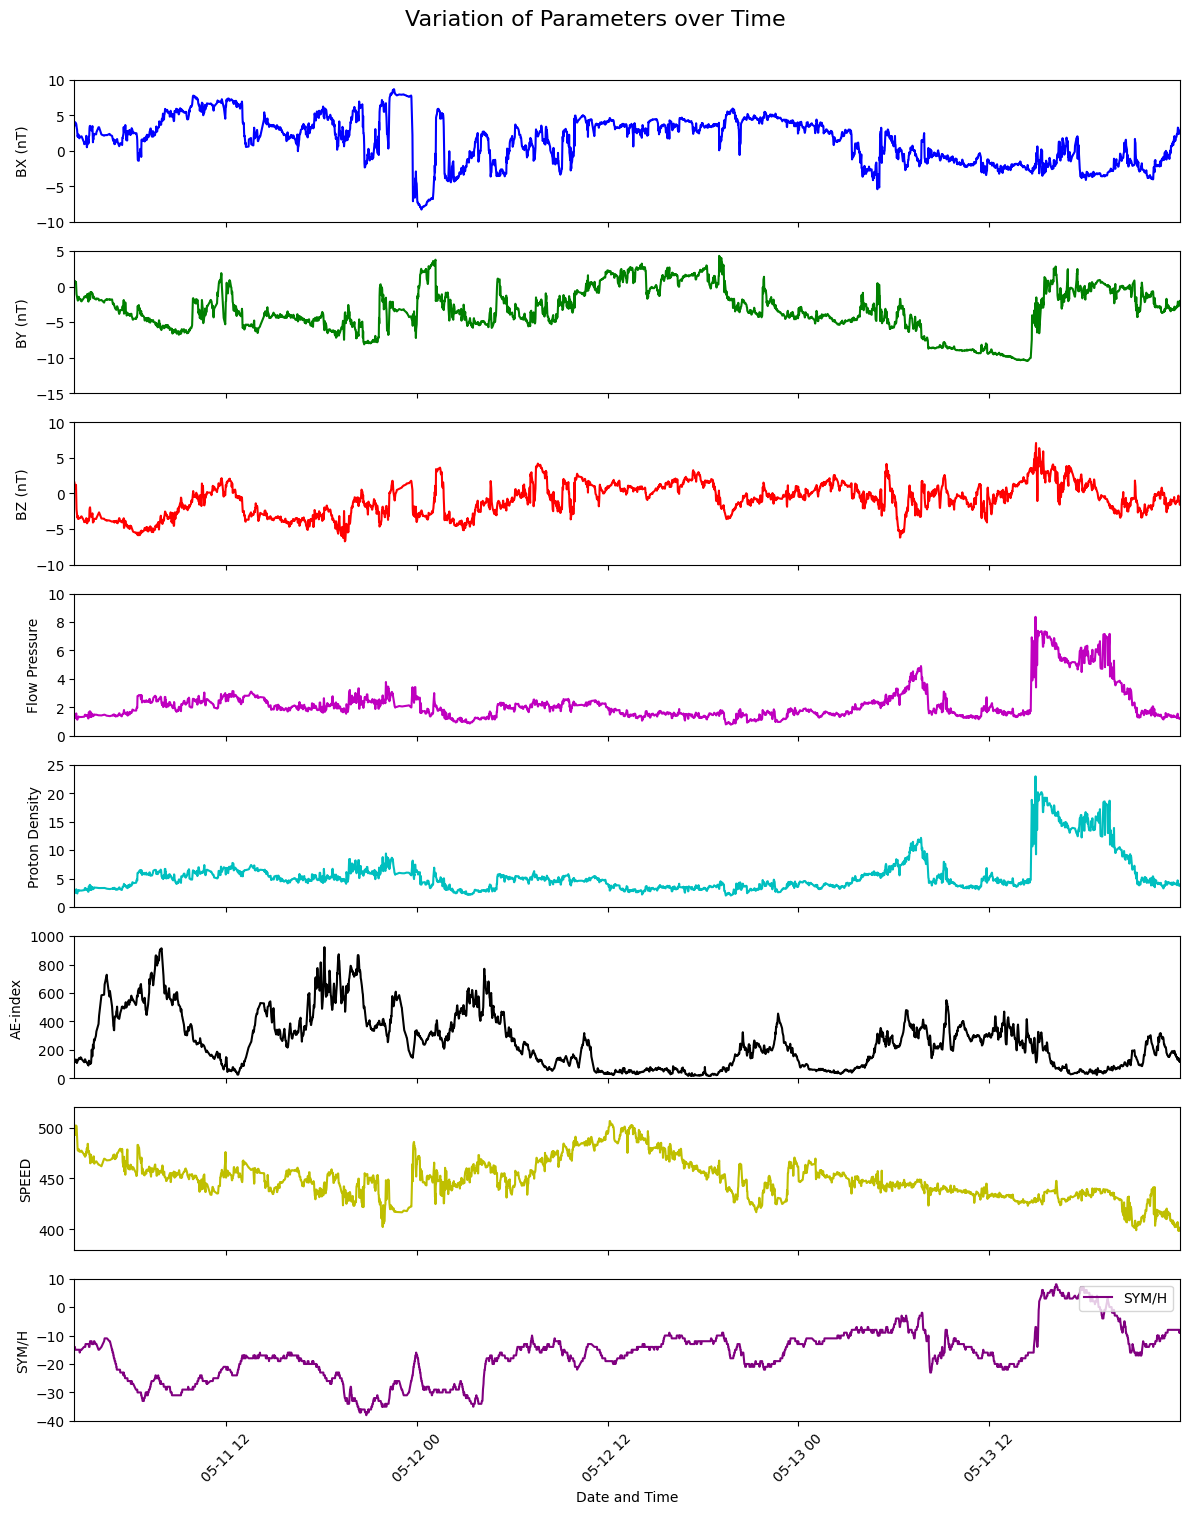

In [8]:
fig, axs = plt.subplots(8, 1, figsize=(12, 15), sharex=True)

axs[0].plot(df['Datetime'], df['BX'], label='BX ', color='b')
axs[0].set_ylabel('BX (nT)')
axs[0].set_ylim(-10, 10)
axs[0].set_xlim(df['Datetime'].iloc[0], df['Datetime'].iloc[-1])

axs[1].plot(df['Datetime'], df['BY'], label='BY', color='g')
axs[1].set_ylabel('BY (nT)')
axs[1].set_ylim(-15, 5)
axs[1].set_xlim(df['Datetime'].iloc[0], df['Datetime'].iloc[-1])

axs[2].plot(df['Datetime'], df['BZ'], label='BZ', color='r')
axs[2].set_ylabel('BZ (nT)')
axs[2].set_ylim(-10, 10)
axs[2].set_xlim(df['Datetime'].iloc[0], df['Datetime'].iloc[-1])

axs[3].plot(df['Datetime'], df['Flow Pressure'], label='Flow Pressure', color='m')
axs[3].set_ylabel('Flow Pressure')
axs[3].set_ylim(0, 10)
axs[3].set_xlim(df['Datetime'].iloc[0], df['Datetime'].iloc[-1])

axs[4].plot(df['Datetime'], df['Proton Density'], label='Proton Density', color='c')
axs[4].set_ylabel('Proton Density')
axs[4].set_ylim(0, 25)
axs[4].set_xlim(df['Datetime'].iloc[0], df['Datetime'].iloc[-1])

axs[5].plot(df['Datetime'], df['AE-index'], label='AE-index', color='k')
axs[5].set_ylabel('AE-index')
axs[5].set_ylim(0, 1000)
axs[5].set_xlim(df['Datetime'].iloc[0], df['Datetime'].iloc[-1])

axs[6].plot(df['Datetime'], df['SPEED'], label='speed', color='y')
axs[6].set_ylabel('SPEED')
axs[6].set_ylim(380, 520)
axs[6].set_xlim(df['Datetime'].iloc[0], df['Datetime'].iloc[-1])

axs[7].plot(df['Datetime'], df['SYM/H'], label='SYM/H', color='purple')
axs[7].set_ylabel('SYM/H')
axs[7].set_ylim(-40, 10)
axs[7].set_xlim(df['Datetime'].iloc[0], df['Datetime'].iloc[-1])


plt.xlabel('Date and Time')

plt.suptitle('Variation of Parameters over Time', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.legend(loc='upper right')

plt.xticks(rotation=45)
plt.show()
